In [154]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [155]:
data = pd.read_csv("/kaggle/input/weather-data/file.csv")
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


# 1) Determine unique 'Wind Speed' values

In [156]:
data.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [157]:
numUniqueWindVals = data.nunique()

In [158]:
uniqueWindVals = data['Wind Speed_km/h'].unique()
uniqueWindVals

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2])

# 2) Number of times weather is 'Exactly Clear'

In [159]:
# using value_counts
data.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [160]:
#using filtering
data[data.Weather == "Clear"]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


In [161]:
#using group_by

data.groupby("Weather").get_group("Clear")

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


# 3) Determine number of times Wind Speed is exactly 4km/h

In [162]:
data.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [163]:
data[data["Wind Speed_km/h"] == 4]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
96,1/5/2012 0:00,-8.8,-11.7,79,4,9.7,100.32,Snow
101,1/5/2012 5:00,-7.0,-9.5,82,4,4.0,100.19,Snow
146,1/7/2012 2:00,-8.1,-11.1,79,4,19.3,100.15,Cloudy
...,...,...,...,...,...,...,...,...
8768,12/31/2012 8:00,-8.6,-10.3,87,4,3.2,101.14,Snow Showers
8769,12/31/2012 9:00,-8.1,-9.6,89,4,2.4,101.09,Snow
8770,12/31/2012 10:00,-7.4,-8.9,89,4,6.4,101.05,"Snow,Fog"
8772,12/31/2012 12:00,-5.8,-7.5,88,4,12.9,100.78,Snow


# 4) Find all Null values

In [164]:
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [165]:
data.notnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0          True    True              True       True             True   
1          True    True              True       True             True   
2          True    True              True       True             True   
3          True    True              True       True             True   
4          True    True              True       True             True   
...         ...     ...               ...        ...              ...   
8779       True    True              True       True             True   
8780       True    True              True       True             True   
8781       True    True              True       True             True   
8782       True    True              True       True             True   
8783       True    True              True       True             True   

      Visibility_km  Press_kPa  Weather  
0              True

# 5) Rename 'Weather' column to 'Weather Condition'

In [166]:
data.rename(columns= {"Weather" : "Weather Condition"}, inplace=True)
data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


# 6) Determine mean of 'Visibility'

In [167]:
data.Visibility_km.mean()

27.664446721311478

# 7) Determine standard deviation of 'Pressure' column

In [168]:
data.Press_kPa.std()

0.8440047459486483

# 8) Determine variance of 'Relative Humidity'

In [169]:
data['Rel Hum_%'].var()

286.24855019850196

# 9) Find all instances of Snow

In [170]:
data.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [171]:
#using value_counts()
data['Weather Condition'].value_counts()

Weather Condition
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle      

In [172]:
#using filterin
data[data['Weather Condition'] == 'Snow']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
55,1/3/2012 7:00,-14.0,-19.5,63,19,25.0,100.95,Snow
84,1/4/2012 12:00,-13.7,-21.7,51,11,24.1,101.25,Snow
86,1/4/2012 14:00,-11.3,-19.0,53,7,19.3,100.97,Snow
87,1/4/2012 15:00,-10.2,-16.3,61,11,9.7,100.89,Snow
88,1/4/2012 16:00,-9.4,-15.5,61,13,19.3,100.79,Snow
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [173]:
#using str.contains() (more accurate)

In [174]:
data[data['Weather Condition'].str.contains('Snow')]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
41,1/2/2012 17:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
44,1/2/2012 20:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
45,1/2/2012 21:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
47,1/2/2012 23:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
48,1/3/2012 0:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


# 10) Find all instances when 'Wind Speed' is above 24 and 'Visibility' is 25

In [175]:
data.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [176]:
data[(data['Wind Speed_km/h'] > 24) & (data['Visibility_km'] == 25)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8705,12/28/2012 17:00,-8.6,-12.0,76,26,25.0,101.34,Mainly Clear
8753,12/30/2012 17:00,-12.1,-15.8,74,28,25.0,101.26,Mainly Clear
8755,12/30/2012 19:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
8759,12/30/2012 23:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


# 11) Determine all the Different types of Weather Conditions

In [177]:
weatherConditions = data['Weather Condition'].unique()
weatherConditions

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

# 12) Create Histogram of 'Weather Condition' Frequencies

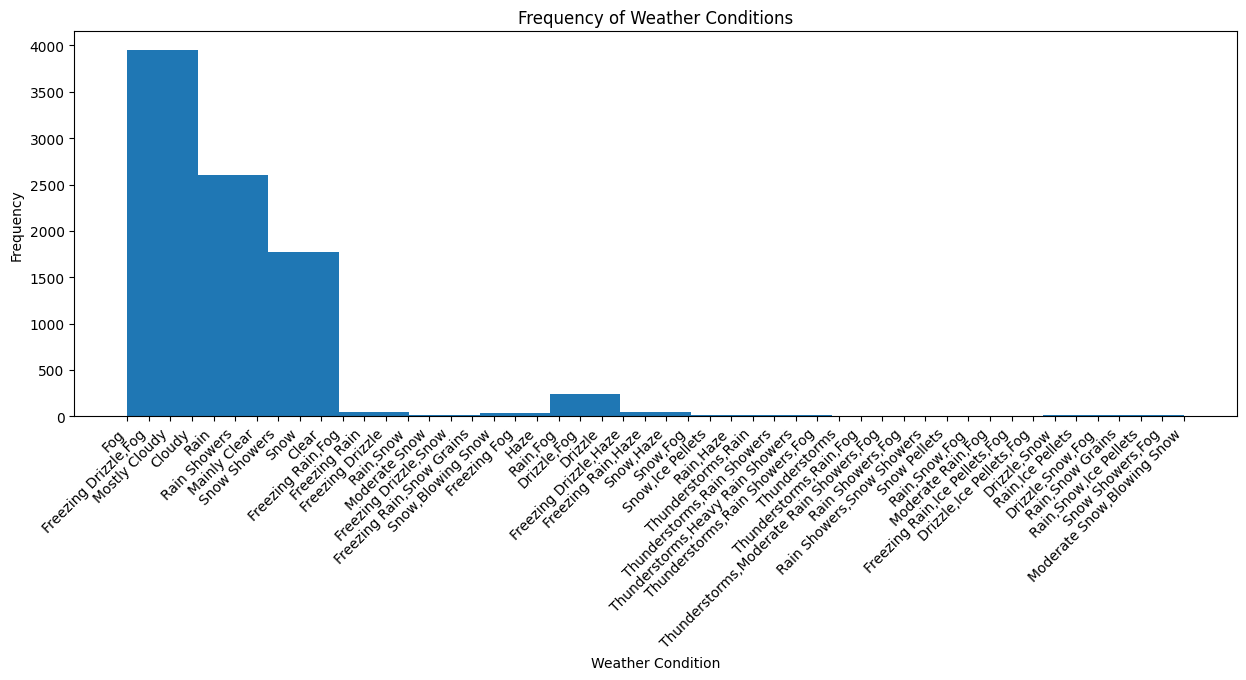

In [178]:
weatherConditions = data['Weather Condition']

plt.figure(figsize=(15, 5))  # Increase the figure width
plt.hist(weatherConditions, bins=15)
plt.xticks(rotation=45, ha='right')
plt.title('Frequency of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.show()


# 13) Create Scatter Plot Comparing Temperature and Humidity

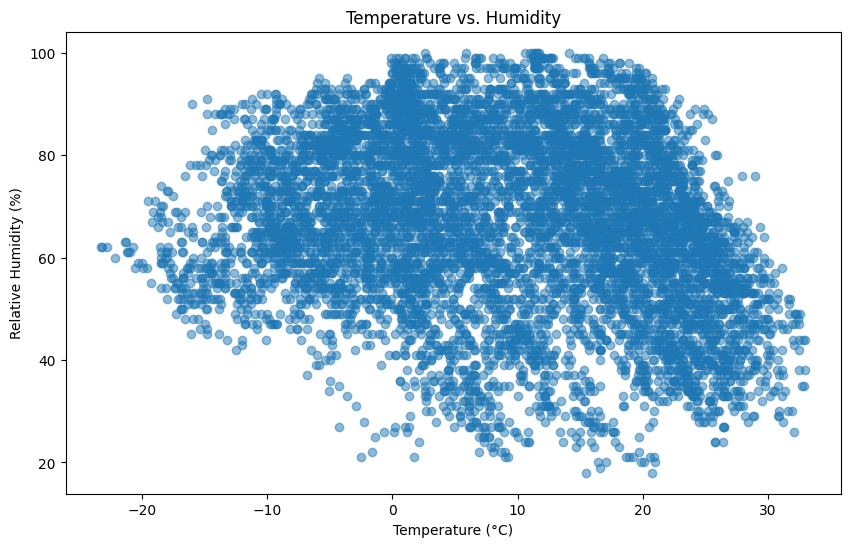

In [179]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Temp_C'], data['Rel Hum_%'], alpha=0.5)
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()

In [180]:
correlation = data['Temp_C'].corr(data['Rel Hum_%'])
correlation

-0.22018192309198523

Indicates a slight negative correlation between Temperature and Humidity